In [1042]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import scipy

missing_values = ['?', 'NA', 'None', 'N/A']
df = pd.read_csv("auto-mpg.data", sep='\s+', na_values = missing_values)

In [991]:
df.duplicated()
#df.mpg.duplicated()  #Duplicates in specific column
#df.drop_duplicates(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [992]:
df.mpg.duplicated().sum()

271

In [993]:
df.duplicated().sum()

2

In [994]:
(~df.duplicated()).sum()

398

In [995]:
df.loc[df.duplicated(), :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
96,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
158,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd


In [996]:
df.loc[df.duplicated(keep='first'), :]  #keep one duplicated record and delete other record(s)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
96,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
158,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd


In [997]:
x_df = df.drop_duplicates()

In [998]:
#x_df.head(99)

In [999]:
len(x_df)

398

In [1000]:
x_df.size

3582

In [1001]:
x_df.shape   # dimension of data frame after removing duplicates

(398, 9)

In [1002]:
x_df['horsepower'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: horsepower, Length: 398, dtype: bool

In [1003]:
x_df['horsepower'].isna().sum()

6

In [1004]:
x_df['horsepower'].isnull().sum()

6

In [1005]:
x_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [1006]:
x_df.shape

(398, 9)

In [1007]:
x_df_d = x_df.dropna()

In [1008]:
x_df_d.shape

(392, 9)

In [1009]:
from sklearn.model_selection import train_test_split

x = x_df_d.iloc[:, :]
y = x_df_d.iloc[:, ]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)
x_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
73,13.0,8,307.0,130.0,4098.0,14.0,72,1,chevrolet chevelle concours (sw)
148,24.0,4,90.0,75.0,2108.0,15.5,74,2,fiat 128
377,36.0,4,105.0,74.0,1980.0,15.3,82,2,volkswagen rabbit l
144,26.0,4,97.0,78.0,2300.0,14.5,74,2,opel manta
161,14.0,8,351.0,148.0,4657.0,13.5,75,1,ford ltd


In [1010]:
x_test.shape

(40, 9)

In [1011]:
x_test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
79,26.0,4,96.0,69.0,2189.0,18.0,72,2,renault 12 (sw)
278,21.6,4,121.0,115.0,2795.0,15.7,78,2,saab 99gle
250,36.1,4,91.0,60.0,1800.0,16.4,78,3,honda civic cvcc
56,26.0,4,91.0,70.0,1955.0,20.5,71,1,plymouth cricket
395,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl


# part 2 (d)

In [976]:
x_actaul = x_test['horsepower']

In [977]:
x_test['x_actual'] = x_actual

In [1014]:
x_test['horsepower'] = None

In [979]:
x_predicted = []

In [982]:
x_predicted = x_test['horsepower'].fillna(x_train['horsepower'].mean())

In [983]:
x_test['x_predicted'] = x_predicted #imputed

In [1015]:
x_test['horsepower'] = x_test['horsepower'].fillna(x_train['horsepower'].mean())

In [925]:
# err = x_test['x_predicted'] - x_test['x_actual']
# x_test['err'] = err

In [926]:
# sq_err = x_test['err'] * x_test['err']
# x_test['sq_err'] = sq_err

In [1040]:
MSE = np.square(np.subtract(x_actual,x_predicted)).mean() 
RMSE = math.sqrt(MSE)
RMSE

39.0307007964458

# part 2 (e)

In [1041]:
x_test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
79,26.0,4,96.0,104.997159,2189.0,18.0,72,2,renault 12 (sw)
278,21.6,4,121.0,104.997159,2795.0,15.7,78,2,saab 99gle
250,36.1,4,91.0,104.997159,1800.0,16.4,78,3,honda civic cvcc
56,26.0,4,91.0,104.997159,1955.0,20.5,71,1,plymouth cricket
395,27.0,4,140.0,104.997159,2790.0,15.6,82,1,ford mustang gl


In [1017]:
#df_weight = pd.DataFrame(x_test['weight'])

In [1018]:
X = [x_test['weight']]

In [1019]:
imputer = KNNImputer(n_neighbors=1)
X_predicted = imputer.fit_transform(X)

In [1020]:
imputer = KNNImputer(n_neighbors=3)
X_predicted = imputer.fit_transform(X)

In [1021]:
imputer = KNNImputer(n_neighbors=5)
X_predicted = imputer.fit_transform(X)

In [1022]:
X_actual = [x_test['weight']]

In [1023]:
#len(X_actual)

In [1024]:
MSE_weight = np.square(np.subtract(X,X_predicted)).mean() 
RMSE_weight = math.sqrt(MSE_weight)
RMSE_weight

0.0

In [1025]:
Y = [x_test['acceleration']]

In [1026]:
imputer = KNNImputer(n_neighbors=1)
Y_predicted = imputer.fit_transform(Y)

In [1027]:
imputer = KNNImputer(n_neighbors=3)
Y_predicted = imputer.fit_transform(Y)

In [1028]:
imputer = KNNImputer(n_neighbors=5)
Y_predicted = imputer.fit_transform(Y)

In [1029]:
MSE_acc = np.square(np.subtract(Y,Y_predicted)).mean() 
RMSE_acc = math.sqrt(MSE_acc)
RMSE_acc

0.0

In [1030]:
Z = [x_test['displacement']]

In [1031]:
imputer = KNNImputer(n_neighbors=1)
Z_predicted = imputer.fit_transform(Z)

In [1032]:
imputer = KNNImputer(n_neighbors=3)
Z_predicted = imputer.fit_transform(Z)

In [1033]:
imputer = KNNImputer(n_neighbors=5)
Z_predicted = imputer.fit_transform(Z)

In [1034]:
MSE_disp = np.square(np.subtract(Z,Z_predicted)).mean() 
RMSE_disp = math.sqrt(MSE_disp)
RMSE_disp

0.0

In [1035]:
W = [x_test['mpg']]

In [1036]:
imputer = KNNImputer(n_neighbors=1)
W_predicted = imputer.fit_transform(W)

In [1037]:
imputer = KNNImputer(n_neighbors=3)
W_predicted = imputer.fit_transform(W)

In [1038]:
imputer = KNNImputer(n_neighbors=5)
W_predicted = imputer.fit_transform(W)

In [1039]:
MSE_mpg = np.square(np.subtract(W,W_predicted)).mean() 
RMSE_mpg = math.sqrt(MSE_disp)
RMSE_mpg

0.0

# part 3 (a)

In [1048]:
#skewness
from scipy.stats import skew 
skew(x_test['mpg'], axis=0, bias=True)   #the distribution is positively skewed

0.4327155462555823

In [1049]:
#kurtosis
from scipy.stats import kurtosis
kurtosis(x_test['mpg'], axis=0, bias=True)     #the distribution has more values in the tails compared to a normal distribution.

-0.27787721173866453

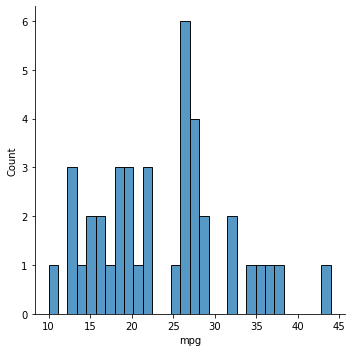

In [1051]:
# Draw the histogram using the seaborn distplot function
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(x_test['mpg'],bins=30,kde=False)
plt.show()